In [1]:
import numpy as np
import pandas
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

In [2]:
'''

Comparing which items in the Urquhart catalog (RMS_LarsonStats.txt) are the same as those in the RAMPS catalog (RAMPS_clump_catalog_diss_data.txt) by location

'''

RAMPS_data = pandas.read_csv('RAMPS_cleaned.csv', sep = ',')
RMS_data = pandas.read_csv('RMS_cleaned.csv', sep=',')
# RAMPS_data['l']
# Urquhart_data.head()

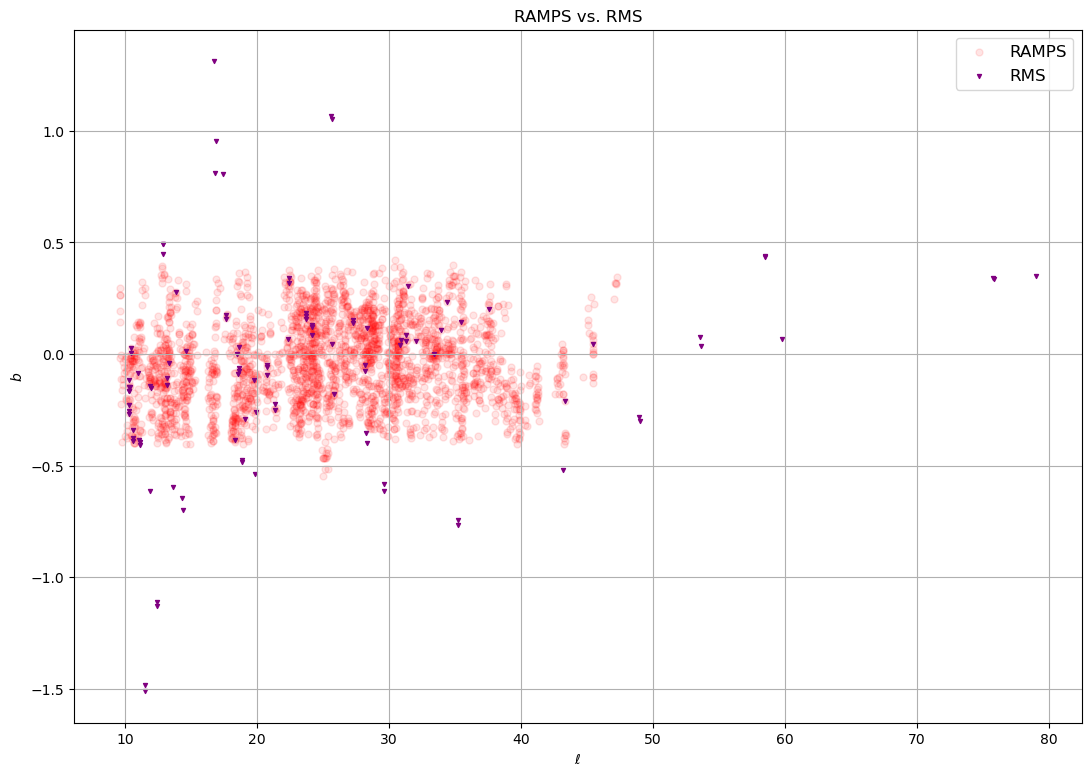

In [5]:
plt.figure(figsize=(13, 9))
plt.scatter(RAMPS_data['l'], RAMPS_data['b'], marker = 'o', s = 25, label='RAMPS', color = 'red', alpha = 0.1)
plt.scatter(RMS_data['l'], RMS_data['b'], marker = 'v', s=8, label = 'RMS', color = 'purple')
plt.legend(fontsize = 'large')
plt.title('RAMPS vs. RMS')
plt.xlabel('$\ell$')
plt.ylabel('$b$')
plt.grid()
plt.savefig('/users/hfwest/GBO-REU/plots/RAMPS_vs_RMS.png')

In [ ]:
max_b = max(RAMPS_data['b'])
min_b = min(RAMPS_data['b'])
print('Max b:', max_b)
print('Min b:', min_b)


Max b: 0.42
Min b: -0.546
Matching indices: [4.6936e-322 1.3196e-320]


In [34]:
threshold = 30/3600 # beamsize in degrees
masked_RMS_l = RMS_data['l'][(RMS_data['b'] < max_b) & (RMS_data['b'] > min_b)]
masked_RMS_b = RMS_data['b'][(RMS_data['b'] < max_b) & (RMS_data['b'] > min_b)]
masked_RMS_dispersion = RMS_data['sigma (km/s)'][(RMS_data['b'] < max_b) & (RMS_data['b'] > min_b)]
masked_RMS_size = RMS_data['Linear Size (pc)'][(RMS_data['b'] < max_b) & (RMS_data['b'] > min_b)]

matching_info = np.array([]).reshape(0, 9)

for i in masked_RMS_b.index: # must iterate through index instead of range of length because it is still using original unmasked indices
    c1 = SkyCoord(masked_RMS_l[i]*u.degree, masked_RMS_b[i]*u.degree, frame='galactic')
    for j in RAMPS_data.index:
        c2 = SkyCoord(RAMPS_data['l'][j]*u.degree, RAMPS_data['b'][j]*u.degree, frame='galactic')
        sep = c1.separation(c2).deg
        if sep < threshold:
            matching_info = np.append(matching_info, np.array([RAMPS_data['l'][j], RAMPS_data['b'][j], 
                                                      masked_RMS_l[i], masked_RMS_b[i], sep, 
                                                      masked_RMS_dispersion[i], masked_RMS_size[i],
                                                      RAMPS_data['sigma (km/s)'][j], RAMPS_data['Linear Size (pc)'][j]]).reshape(1, 9), axis = 0)


In [ ]:
matching_DF = pandas.DataFrame(matching_info, columns=['RAMPS l', 'RAMPS b', 'RMS l', 'RMS b', 'Separation (deg)',
                                                      'RMS Dispersion (km/s)', 'RMS Size (pc)',
                                                      'RAMPS Dispersion (km/s)', 'RAMPS Size (pc)'])
matching_DF
# matching_DF.to_csv('RMS-RAMPS-Match.csv', header = ['RAMPS l', 'RAMPS b', 'RMS l', 'RMS b', 'Separation (deg)',
#                                                       'RMS Dispersion (km/s)', 'RMS Size (pc)',
#                                                       'RAMPS Dispersion (km/s)', 'RAMPS Size (pc)'], index = False)